In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import math

In [101]:
'''dataset load'''
wine_data = pd.read_csv('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/winedata/wine.data', header=None)
wine_name = open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/winedata/wine.names', 'r')

letter_data = pd.read_csv('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/letter-recognitiondata/letter-recognition.data', header=None)
letter_name = open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/letter-recognitiondata/letter-recognition.names', 'r')

train_data= open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/hw1data/train.txt', 'r')
test_data= open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw2/hw1data/test.txt', 'r')
np_traindata=np.loadtxt('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/train.txt', dtype = 'str')
np_testdata=np.loadtxt('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/test.txt', dtype = 'str')

In [382]:
# wine_name.readlines()
'''
178 rows x 14 cols
row: 개수
col: 0번째- 와인품종 3개 index (class)
     각각 59, 71, 48개
     13개는 추출된 chemical features
'''
wine_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [103]:
# letter_name.readlines()
'''
20000 rows x 17 cols (제목도 row)
row: 개수
col: 0번째- capital letter (class) 각각 700-800개
     16개 feature
'''
letter_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


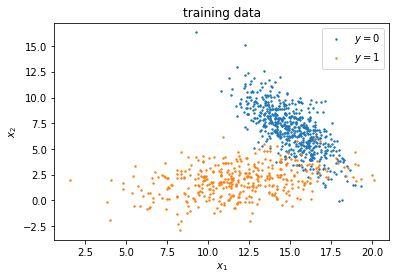

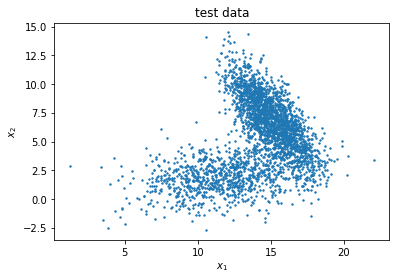

In [25]:
np_train_data=np_traindata.astype(float)
np_test_data=np_testdata.astype(float)

'''
train: 1000개 class0 600, class1 400 feature2개
       마지막 col 이 class
test: 3000개
'''

plt.scatter(np_train_data[:,0][:600], np_train_data[:,1][:600], s=2, label='$y=0$') #class0
plt.scatter(np_train_data[:,0][600:], np_train_data[:,1][600:], s=2, label='$y=1$') #class1
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.show()

plt.scatter(np_test_data[:,0],np_test_data[:,1], s=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('test data')
plt.show()

In [429]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    # Set title
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    fig.tight_layout()

    return ax



def RM_data(x, order):
    [m,d]=x.shape
    # m= num of samples
    # d= feature dim
    
    out_data=np.ones((m,1))

    for i in range(order):
        for k in range(d):
            out_data=np.concatenate((out_data, np.expand_dims(x[:,k], axis=1)**(i+1)),1)
 
    for i in range(order):
        out_data=np.concatenate((out_data, np.expand_dims(np.sum(x,1), axis=1)**(i+1)),1)

    for i in range(order-1):
        out_data=np.concatenate((out_data,x*np.expand_dims(np.sum(x,1)**(i+1), axis=1)),1)

    # mxK
    # K=1+r+d*(2*r-1)
    # print('K dim:',out_data.shape)
    return out_data



def preds2labels(preds, labels):
    search = np.searchsorted(preds, labels)
    a = preds[search - 1]
    b = preds[np.minimum(len(preds) - 1, search)]
    return np.where(np.fabs(labels - a) < np.fabs(labels - b), a, b)



def TER(y_target, y_pred):
    num_class=np.max(y_target)
    num_samples_class=np.zeros((int(num_class)))
    loss=0
    y_pred=preds2labels(np.arange(1,int(num_class)+1), y_pred)
    for c in range(int(num_class)):
        c_idx=np.where(y_target==c+1)[0]
        num_samples_class[c]=c_idx.shape[0]
        if num_samples_class[c]>0:
            loss+=(y_target[c_idx]!=y_pred[c_idx]).sum()/num_samples_class[c]
    return loss

g: 0.01, score: 0.650952380952381
g: 0.1, score: 0.42142857142857143
g: 0.3, score: 0.3988888888888889
g: 1, score: 0.3988888888888889


SVM:  0.42714285714285716
SVM test w/ TER score:  1.906262626262626


order:  2
TER-RM:  0.6514048116906539
TER-RM w/ TER score:  0.3218355500708442
order:  3
TER-RM:  0.35552212169050834
TER-RM w/ TER score:  0.6061800127976598
order:  4
TER-RM:  0.14672521912329875
TER-RM w/ TER score:  0.6223270030622972
order:  5
TER-RM:  -0.7505600963510162
TER-RM w/ TER score:  0.6994083367612779


Linear Regression:  0.8623356721876723
Linear Regression w/ TER score:  0.17230380730380732




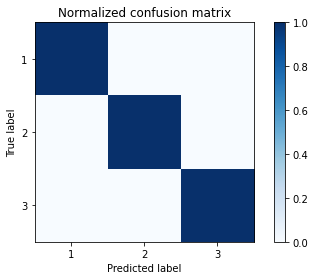

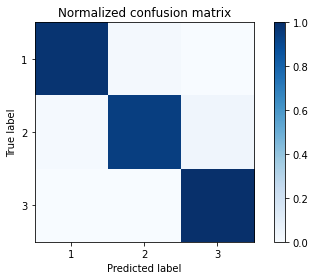

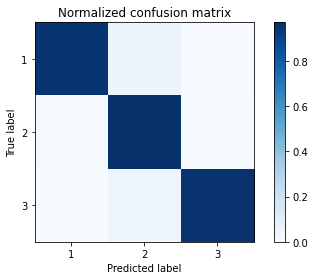

In [425]:
# Wine dataset
wine_target=np.array(wine_data)[:,0]
wine_input=np.array(wine_data)[:,1:]

idx = np.arange(wine_target.shape[0])
np.random.shuffle(idx)

wine_target=wine_target[idx]
wine_input=wine_input[idx]

num_class=3
wine_class= np.arange(1,num_class+1)




'''SVM'''
# Study
for g in (0.01,0.1, 0.3, 1):
    print('g: {}, score: {}'.format(g, cross_val_score(SVC(gamma=g, kernel='rbf'), wine_input, wine_target, cv=5).mean()))
print('\n')


g=1/wine_input.shape[1]
svm_model=SVC(gamma=g, kernel='rbf')
svm_model.fit(wine_input, wine_target)
print('SVM: ',cross_val_score(svm_model, wine_input, wine_target, cv=5).mean())
print('SVM test w/ TER score: ',cross_val_score(svm_model, wine_input, wine_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''TER-RM'''
orders=[2,3,4,5] 
for r in orders:
    wine_rm_input= RM_data(wine_input, r)
    rm_model=LinearRegression()
    rm_model.fit(wine_rm_input, wine_target)
    wine_pred=rm_model.predict(wine_rm_input)

    print('order: ',r)
    print('TER-RM: ',cross_val_score(rm_model, wine_rm_input, wine_target, cv=5).mean())
    print('TER-RM w/ TER score: ',cross_val_score(rm_model, wine_rm_input, wine_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''Linear Regression'''
lr_model=LinearRegression()
lr_model.fit(wine_input, wine_target)
print('Linear Regression: ',cross_val_score(lr_model, wine_input, wine_target, cv=5).mean())
print('Linear Regression w/ TER score: ',cross_val_score(lr_model, wine_input, wine_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')


# Plot normalized confusion matrix
wine_pred=svm_model.predict(wine_input)
plot_confusion_matrix(wine_target, wine_pred, classes=wine_class, normalize=True)
plt.show()

wine_pred=rm_model.predict(wine_rm_input)
wine_pred=preds2labels(wine_class, wine_pred)
plot_confusion_matrix(wine_target, wine_pred, classes=wine_class, normalize=True)
plt.show()

wine_pred=lr_model.predict(wine_input)
wine_pred=preds2labels(wine_class, wine_pred)
plot_confusion_matrix(wine_target, wine_pred, classes=wine_class, normalize=True)
plt.show()

SVM:  0.97395
SVM test w/ TER score:  0.6828261018631844


order:  2
TER-RM:  0.41789360831271444
TER-RM w/ TER score:  24.276696800575685
order:  3
TER-RM:  0.439479531285872
TER-RM w/ TER score:  24.28304320422092
order:  4
TER-RM:  0.4818579550433394
TER-RM w/ TER score:  24.110067195475505
order:  5
TER-RM:  0.48996220252119266
TER-RM w/ TER score:  24.129043075865802


Linear Regression:  0.28466783012272723
Linear Regression w/ TER score:  24.76372366413116




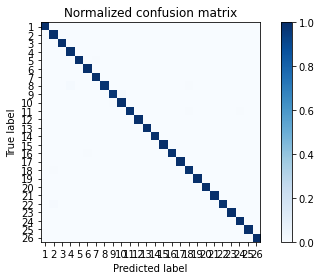

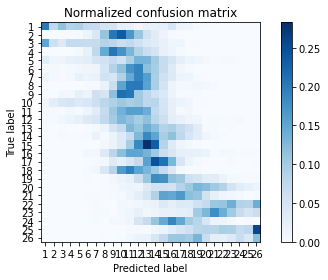

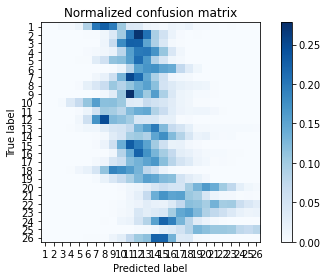

In [428]:
# Letter recognition dataset
letter_target_alp=np.array(letter_data)[:,0]
letter_target=np.array([ord(i)-64 for i in letter_target_alp])
letter_input=np.array(letter_data)[:,1:]

idx = np.arange(letter_target.shape[0])
np.random.shuffle(idx)

letter_target=letter_target[idx]
letter_input=letter_input[idx]

num_class=26
letter_class= np.arange(1,num_class+1)




'''SVM'''
g=1/letter_input.shape[1]
svm_model=SVC(gamma=g, kernel='rbf')
svm_model.fit(letter_input, letter_target)
print('SVM: ',cross_val_score(svm_model, letter_input, letter_target, cv=5).mean())
print('SVM test w/ TER score: ',cross_val_score(svm_model, letter_input, letter_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''TER-RM'''
orders=[2,3,4,5] 
for r in orders:
    letter_rm_input= RM_data(letter_input, r)
    rm_model=LinearRegression()
    rm_model.fit(letter_rm_input, letter_target)
    letter_pred=rm_model.predict(letter_rm_input)

    print('order: ',r)
    print('TER-RM: ',cross_val_score(rm_model, letter_rm_input, letter_target, cv=5).mean())
    print('TER-RM w/ TER score: ',cross_val_score(rm_model, letter_rm_input, letter_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''Linear Regression'''
lr_model=LinearRegression()
lr_model.fit(letter_input, letter_target)
print('Linear Regression: ',cross_val_score(lr_model, letter_input, letter_target, cv=5).mean())
print('Linear Regression w/ TER score: ',cross_val_score(lr_model, letter_input, letter_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')


# Plot normalized confusion matrix
letter_pred=svm_model.predict(letter_input)
plot_confusion_matrix(letter_target, letter_pred, classes=letter_class, normalize=True)
plt.show()

letter_pred=rm_model.predict(letter_rm_input)
letter_pred=preds2labels(letter_class, letter_pred)
plot_confusion_matrix(letter_target, letter_pred, classes=letter_class, normalize=True)
plt.show()

letter_pred=lr_model.predict(letter_input)
letter_pred=preds2labels(letter_class, letter_pred)
plot_confusion_matrix(letter_target, letter_pred, classes=letter_class, normalize=True)
plt.show()

SVM:  0.945
SVM test w/ TER score:  0.12249999999999998


order:  2
TER-RM:  0.7357455724805408
TER-RM w/ TER score:  0.1488235547887657
order:  3
TER-RM:  0.7728969172852749
TER-RM w/ TER score:  0.1490953347606184
order:  4
TER-RM:  0.7736386877322958
TER-RM w/ TER score:  0.13830326715627164
order:  5
TER-RM:  0.7077184182208169
TER-RM w/ TER score:  0.14031086694621347


Linear Regression:  0.70470630682336
Linear Regression w/ TER score:  0.15620314794628165




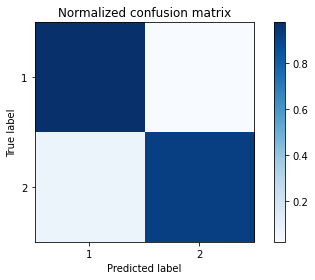

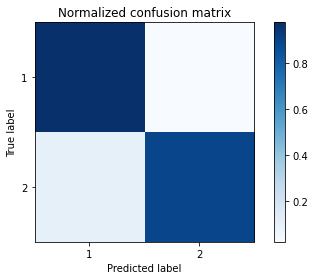

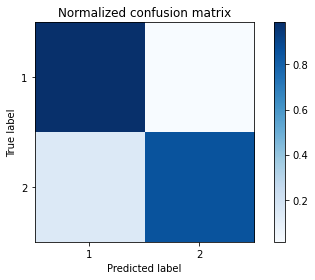

In [427]:
# Hw1 dataset
hw1_input=np_train_data[:,:2]
hw1_target=np_train_data[:,2].astype(int)
hw1_target=hw1_target+np.ones_like(hw1_target)

idx = np.arange(hw1_target.shape[0])
np.random.shuffle(idx)

hw1_target=hw1_target[idx]
hw1_input=hw1_input[idx]

num_class=2
hw1_class= np.arange(1,num_class+1)



'''SVM'''
g=1/hw1_input.shape[1]
svm_model=SVC(gamma=g, kernel='rbf')
svm_model.fit(hw1_input, hw1_target)
print('SVM: ',cross_val_score(svm_model, hw1_input, hw1_target, cv=5).mean())
print('SVM test w/ TER score: ',cross_val_score(svm_model, hw1_input, hw1_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''TER-RM'''
orders=[2,3,4,5] 
for r in orders:
    hw1_rm_input= RM_data(hw1_input, r)
    rm_model=LinearRegression()
    rm_model.fit(hw1_rm_input, hw1_target)
    hw1_pred=rm_model.predict(hw1_rm_input)

    print('order: ',r)
    print('TER-RM: ',cross_val_score(rm_model, hw1_rm_input, hw1_target, cv=5).mean())
    print('TER-RM w/ TER score: ',cross_val_score(rm_model, hw1_rm_input, hw1_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')



'''Linear Regression'''
lr_model=LinearRegression()
lr_model.fit(hw1_input, hw1_target)
print('Linear Regression: ',cross_val_score(lr_model, hw1_input, hw1_target, cv=5).mean())
print('Linear Regression w/ TER score: ',cross_val_score(lr_model, hw1_input, hw1_target, cv=5, scoring=make_scorer(TER)).mean())
print('\n')


# Plot normalized confusion matrix
hw1_pred=svm_model.predict(hw1_input)
plot_confusion_matrix(hw1_target, hw1_pred, classes=hw1_class, normalize=True)
plt.show()

hw1_pred=rm_model.predict(hw1_rm_input)
hw1_pred=preds2labels(hw1_class, hw1_pred)
plot_confusion_matrix(hw1_target, hw1_pred, classes=hw1_class, normalize=True)
plt.show()

hw1_pred=lr_model.predict(hw1_input)
hw1_pred=preds2labels(hw1_class, hw1_pred)
plot_confusion_matrix(hw1_target, hw1_pred, classes=hw1_class, normalize=True)
plt.show()